Практика. Метод Монте-Карло


In [ ]:
import random

def simulate_exam(num_trials: int = 100000):
    """
    Студент знает 24 вопроса из 30.
    Преподаватель задает один случайный вопрос.
    Если студент его не знает, задается еще один (другой).
    Зачет ставится, если хотя бы один из двух известен студенту.
    """
    passes = 0
    for _ in range(num_trials):
        # Обозначим вопросы:
        # 1..24  известные
        # 25..30  неизвестные
        questions = list(range(1, 31))

        # первый вопрос
        q1 = random.choice(questions)

        if q1 <= 24:
            # знает первый сразу зачет
            passes += 1
        else:
            # не знает первый задаем второй, другой
            remaining = [q for q in questions if q != q1]
            q2 = random.choice(remaining)

            if q2 <= 24:
                passes += 1
            # иначе оба неизвестны завал, ничего не добавляем

    return passes / num_trials

In [2]:
simulate_exam(100)

0.98

In [3]:
simulate_exam(10)

0.8

In [4]:
simulate_exam(1000)

0.969

In [5]:
simulate_exam(1000000)

0.965882

In [6]:

def birthday_prob(n_people: int, trials: int = 1000):
    """
    оценка вероятности того,
    что в группе из n_people хотя бы у двух человек совпадут дни рождения.
    """
    collisions = 0

    for _ in range(trials):
        # генерируем дни рождения для всех людей
        birthdays = [random.randint(1, 365) for _ in range(n_people)]

        # проверяем совпадение
        if len(birthdays) != len(set(birthdays)):
            collisions += 1

    return collisions / trials

In [7]:
birthday_prob(23)

0.53

In [8]:
birthday_prob(10)

0.104

In [9]:
birthday_prob(30)

0.713

In [10]:
birthday_prob(50)

0.964

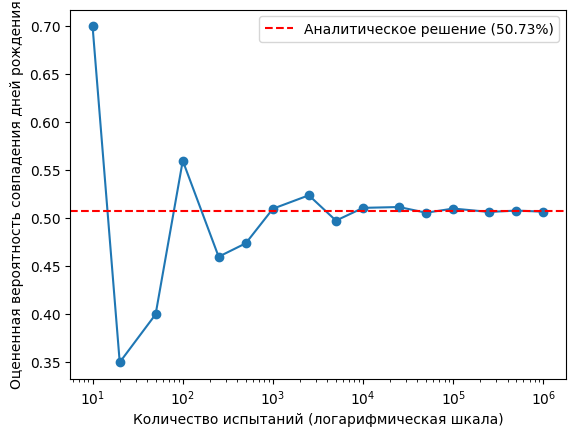

In [ ]:
# визуализация сходимости к аналитического решения
import matplotlib.pyplot as plt
trials = [10, 20, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000]
probs = [birthday_prob(23, t) for t in trials]
plt.plot(trials, probs, marker='o')
plt.xscale('log')
plt.axhline(y=0.5073, color='r', linestyle='--',
            label='Аналитическое решение (50.73%)')
plt.xlabel('Количество испытаний (логарифмическая шкала)')
plt.ylabel('Оцененная вероятность совпадения дней рождения')
plt.legend()

plt.show()

In [12]:
def triangle_from_broken_stick(trials: int = 100000, length: float = 1.0) -> float:
    """
    оценка вероятности того, что из трех отломившихся частей можно составить треугольник.
    """
    success = 0

    for _ in range(trials):
        # выбираем две случайные точки
        x = random.random() * length
        y = random.random() * length
        # сортируем, чтобы x < y
        x, y = sorted([x, y])

        # три отрезка
        a = x
        b = y - x
        c = length - y

        # проверка "условия треугольника"
        if max(a, b, c) < length / 2:
            success += 1

    return success / trials

In [13]:
triangle_from_broken_stick()

0.24643

In [14]:
triangle_from_broken_stick(100)

0.23

In [15]:
triangle_from_broken_stick(1000)

0.221

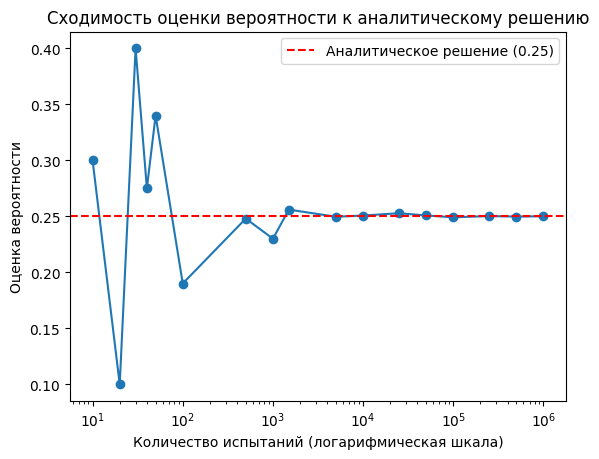

In [16]:
# визуализация сходимости к аналитическому решению
import matplotlib.pyplot as plt
trials_list = [10, 20, 30, 40, 50, 100,500,1000, 1500, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000]
probs = [triangle_from_broken_stick(trials=n) for n in trials_list]

plt.plot(trials_list, probs, marker='o')
plt.xscale('log')
plt.axhline(y=0.25, color='r', linestyle='--', label='Аналитическое решение (0.25)')
plt.xlabel('Количество испытаний (логарифмическая шкала)')
plt.ylabel('Оценка вероятности')
plt.title('Сходимость оценки вероятности к аналитическому решению')
plt.legend()
plt.show()

In [18]:
print('1')

1
